In [15]:
import xarray as xr 
import tams
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
root = "./"
pr_pre = "precipitation_IMERG_1999_WA" # This can be changed to match the data and resolution.
data_path_pr = f"{root}TFM/{pr_pre}_0.25x0.25.nc"

temp_pre = "tb_merg_1999_WA" # This can be changed to match the data and resolution.
data_path_temp = f"{root}TFM/{temp_pre}_0.25x0.25.nc"


In [3]:
pr_data = xr.open_dataset(data_path_pr)
pr_data = pr_data.transpose("time", "lat", "lon") # In order to put dims correctly time,lat,lon.
temp_data = xr.open_dataset(data_path_temp)

c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pr_data.variables

Frozen({'precipitation': <xarray.Variable (time: 5856, lat: 119, lon: 359)> Size: 1GB
[250174176 values with dtype=float32]
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\..., 'time': <xarray.IndexVariable 'time' (time: 5856)> Size: 47kB
array(['1999-06-01T00:00:00.000000000', '1999-06-01T00:30:00.000000000',
       '1999-06-01T01:00:00.000000000', ..., '1999-09-30T22:30:00.000000000',
       '1999-09-30T23:00:00.000000000', '1999-09-30T23:30:00.000000000'],
      shape=(5856,), dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 359)> Size: 3kB
array([-39.75, -39.5 , -39.25, ...,  49.25,  49.5 ,  49.75], shape=(359,))
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat'

In [5]:
temp_data.variables

Frozen({'Tb': <xarray.Variable (time: 5856, lat: 119, lon: 359)> Size: 1GB
[250174176 values with dtype=float32]
Attributes:
    standard_name:  brightness_temperature
    units:          K, 'time': <xarray.IndexVariable 'time' (time: 5856)> Size: 47kB
array(['1999-06-01T00:00:00.000000000', '1999-06-01T00:30:00.000000000',
       '1999-06-01T01:00:00.000000000', ..., '1999-09-30T22:30:00.000000000',
       '1999-09-30T23:00:00.000000000', '1999-09-30T23:30:00.000000000'],
      shape=(5856,), dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    axis:           T, 'lon': <xarray.IndexVariable 'lon' (lon: 359)> Size: 3kB
array([-39.75, -39.5 , -39.25, ...,  49.25,  49.5 ,  49.75], shape=(359,))
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 119)> Size: 952B
array([ 0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  

In [6]:
# We need to create a data set that contains both values as tams.run needs tb and precip.

ds_full = xr.merge([temp_data, pr_data])
ds_full = ds_full.rename({"Tb":"ctt","precipitation":"pr"})

In [7]:
ds_full

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 5856, lat: 119, lon: 359)
Coordinates:
  * time     (time) datetime64[ns] 47kB 1999-06-01 ... 1999-09-30T23:30:00
  * lat      (lat) float64 952B 0.25 0.5 0.75 1.0 1.25 ... 29.0 29.25 29.5 29.75
  * lon      (lon) float64 3kB -39.75 -39.5 -39.25 -39.0 ... 49.25 49.5 49.75
Data variables:
    ctt      (time, lat, lon) float32 1GB ...
    pr       (time, lat, lon) float32 1GB ...
Attributes: (12/13)
    CDI:             Climate Data Interface version 2.0.4 (https://mpimet.mpg...
    Conventions:     CF-1.6
    BeginDate:       1999-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         1999-06-01
    EndTime:         00:59:59.999Z
    ...              ...
    InputPointer:    merg_1999060100_4km-pixel
    title:           NCEP/CPC 4km Global (60N - 60S) IR Dataset
    ProductionTime:  2025-08-16T01:55:40.709Z
    DOI:             10.5067/P4HZB9N27EKU
    history:         Wed Feb 18 12:18:29 2026: cdo remapcon2,/home/emohino/wo...
    CDO:             Climate Data Operators version 2.0.4 (https://mpimet.mpg...

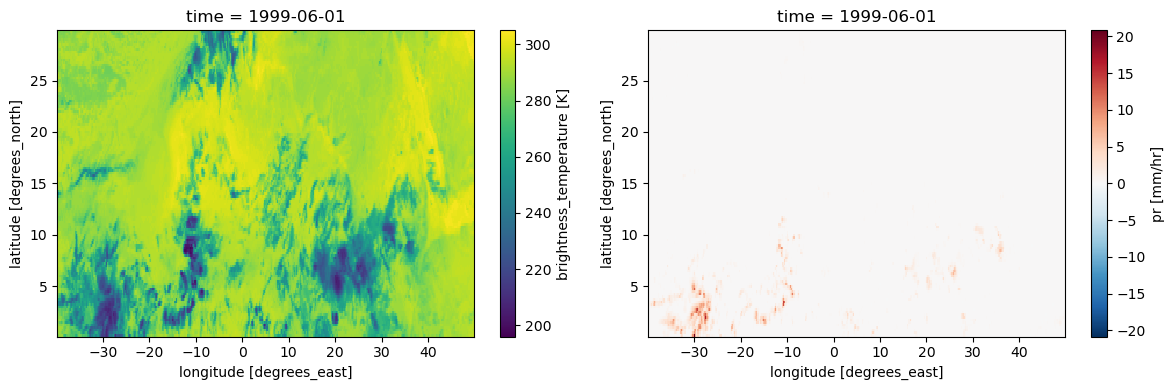

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ds_full.ctt.isel(time=0).plot(ax=ax1)
ds_full.pr.isel(time=0).plot(ax=ax2)

plt.tight_layout()
plt.show()

In [9]:
ds_test = ds_full.sel(time=slice('1999-06-01','1999-06-30'))
ds_test

<xarray.Dataset> Size: 492MB
Dimensions:  (time: 1440, lat: 119, lon: 359)
Coordinates:
  * time     (time) datetime64[ns] 12kB 1999-06-01 ... 1999-06-30T23:30:00
  * lat      (lat) float64 952B 0.25 0.5 0.75 1.0 1.25 ... 29.0 29.25 29.5 29.75
  * lon      (lon) float64 3kB -39.75 -39.5 -39.25 -39.0 ... 49.25 49.5 49.75
Data variables:
    ctt      (time, lat, lon) float32 246MB ...
    pr       (time, lat, lon) float32 246MB ...
Attributes: (12/13)
    CDI:             Climate Data Interface version 2.0.4 (https://mpimet.mpg...
    Conventions:     CF-1.6
    BeginDate:       1999-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         1999-06-01
    EndTime:         00:59:59.999Z
    ...              ...
    InputPointer:    merg_1999060100_4km-pixel
    title:           NCEP/CPC 4km Global (60N - 60S) IR Dataset
    ProductionTime:  2025-08-16T01:55:40.709Z
    DOI:             10.5067/P4HZB9N27EKU
    history:         Wed Feb 18 12:18:29 2026: cdo remapcon2,/home/emohino/wo...
    CDO:             Climate Data Operators version 2.0.4 (https://mpimet.mpg...

In [10]:
ce, mcs, mcs_sumary = tams.run(ds_test, parallel=True)

Starting `identify` 2026-02-22 11:33:04


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-2)]: Done  47 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-2)]: Done  84 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-2)]: Done 131 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-2)]: Done 167 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   

Starting `track` 2026-02-22 11:36:13
Starting `classify` 2026-02-22 11:38:29


c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\core.py:824: FutureWarning: Calling ``EllipseModel()`` (without arguments) has been deprecated since version 0.26 and will be removed in version 2.2; see help for ``EllipseModel``.
  m = EllipseModel()
c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\core.py:825: FutureWarning: `estimate` is deprecated since version 0.26 and will be removed in version 2.2. Please use `EllipseModel.from_estimate` class constructor instead.
  success = m.estimate(xy)
c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\core.py:831: FutureWarning: `params` is deprecated since version 0.26 and will be removed in version 2.2. `params` attribute deprecated; use `center, axis_lengths, theta` attributes instead.
  _, _, xhw, yhw, _ = m.params
c:\Users\Mr. Lettucce\.conda\envs\py312_env\Lib\site-packages\tams\core.py:824: FutureWarning: Calling ``EllipseModel()`` (without arguments) has been deprecated since versi

Starting statistics calculations 2026-02-22 11:41:05
Starting CE aggregation (into MCS time series) 2026-02-22 11:41:05
Starting gridded data aggregation 2026-02-22 11:42:32


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-2)]: Done  47 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-2)]: Done  84 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-2)]: Done 131 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-2)]: Done 167 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1

Computing stats for MCS summary dataset 2026-02-22 11:49:36
Done 2026-02-22 11:49:53


In [11]:
mcs_sumary

first_time           last_time        duration  mcs_id  \
0    1999-06-01 00:00:00 1999-06-01 06:30:00 0 days 07:00:00       0   
1    1999-06-01 00:00:00 1999-06-01 01:30:00 0 days 02:00:00       1   
2    1999-06-01 00:00:00 1999-06-01 01:30:00 0 days 02:00:00       2   
3    1999-06-01 00:00:00 1999-06-01 05:30:00 0 days 06:00:00       3   
4    1999-06-01 00:00:00 1999-06-01 01:00:00 0 days 01:30:00       4   
...                  ...                 ...             ...     ...   
1850 1999-06-30 21:30:00 1999-06-30 23:30:00 0 days 02:30:00    1850   
1851 1999-06-30 21:30:00 1999-06-30 23:30:00 0 days 02:30:00    1851   
1852 1999-06-30 21:30:00 1999-06-30 23:30:00 0 days 02:30:00    1852   
1853 1999-06-30 22:30:00 1999-06-30 23:30:00 0 days 01:30:00    1853   
1854 1999-06-30 22:30:00 1999-06-30 22:30:00 0 days 00:30:00    1854   

     mcs_class  mean_mean_pr  mean_mean_pr219  mean_mean_ctt219  \
0          DLL      1.107533         2.105601        213.839856   
1          DSL      3.750025         4.797628        211.590007   
2          DSL      2.149528         2.358727        210.235958   
3          DLL      0.739012         1.089279        213.561231   
4          DSL      0.482737         0.639944        215.735653   
...        ...           ...              ...               ...   
1850       DSL      2.035015         3.289571        206.268884   
1851       DSL        2.2735         3.177654        215.714286   
1852       DSL      1.148397         1.430192        221.520873   
1853       DSL      1.015522         2.940707        211.935988   
1854       DSL      2.697166         4.003737        214.769231   

      mean_std_ctt219  mean_area_km2  mean_area219_km2  mean_nce  \
0            3.893078  145032.036094      25389.661705  1.285714   
1            4.581679   14957.801065       7196.996681       1.0   
2             5.81985   15515.926823       8456.612839       1.0   
3            8.994682  102800.587999      55883.309372       1.0   
4            2.930354   30809.565757       9794.160698       1.0   
...               ...            ...               ...       ...   
1850         9.320655  170359.262273      90868.938865       1.2   
1851         2.523069    23706.96423        7634.27831       1.0   
1852        28.947428  254704.929754     196425.282074       1.0   
1853         4.727231  183885.768886      34326.968448       1.0   
1854         7.485028   25697.108785       6991.309102       1.0   

                  first_centroid               last_centroid  distance_km  
0        POINT (21.5519 6.50945)    POINT (22.94387 6.90652)   161.134747  
1       POINT (-8.78632 4.33213)    POINT (-9.04541 4.37893)    29.309078  
2       POINT (-10.49322 5.4428)   POINT (-10.64086 5.19005)    32.585399  
3      POINT (-10.51373 8.05295)  POINT (-11.48195 10.11322)   253.411314  
4     POINT (-10.89323 11.22285)  POINT (-11.22989 11.00462)    44.661836  
...                          ...                         ...          ...  
1850   POINT (-5.31077 11.89854)   POINT (-5.85517 11.88797)    60.614187  
1851    POINT (-9.52168 5.13106)    POINT (-9.73836 4.81831)    42.355041  
1852   POINT (-10.53095 13.6399)  POINT (-10.94393 13.74127)    47.337981  
1853   POINT (34.82981 11.85321)     POINT (34.0992 12.9143)   143.411776  
1854   POINT (-30.84349 5.22462)   POINT (-30.84349 5.22462)          0.0  

[1855 rows x 15 columns]

In [12]:
# We can check mcs by their duration
long_storms = mcs_sumary[mcs_sumary.duration > pd.Timedelta(hours=6)] # This will catch three types of MCS -> MCC, DLL and CCC.


print(f"Found {len(long_storms)}")

Found 313


In [ ]:
# Let's use a way to reduce the processes times by grouping mcs by duration.

over_6 = mcs_sumary[mcs_sumary['duration']>pd.Timedelta(hours=6)]
targets_id = over_6['mcs_id'].values

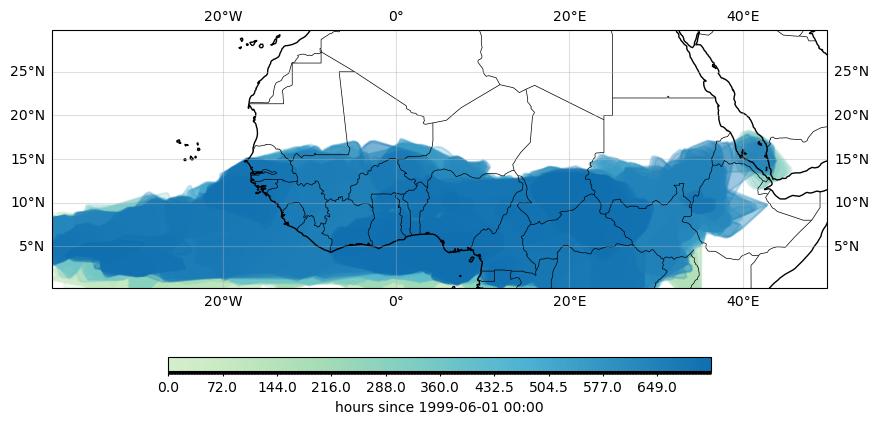

In [18]:
# Ploting mcs 

lon_min = ds_test.lon.min().values
lon_max = ds_test.lon.max().values
lat_min = ds_test.lat.min().values
lat_max = ds_test.lat.max().values

fig, ax = plt.subplots(figsize=(10,6),subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines(linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, alpha = 0.4, linestyle='-')
#gl = ax.gridlines(
#    draw_labels=True,  # Turns on the degree text
#    color='gray',      # Matches the gray grid lines
#    alpha=0.5,         # Makes the grid lines slightly transparent
#    linestyle='-'
#)


tams.plot_tracked(mcs[mcs['mcs_id'].isin(targets_id)], ax=ax, label="none", add_colorbar=True)
# plot_tracked takes huge time in tracking and plotting mcs and the computational time and processes are proportional to your data preprocesses
# and the temporal/spatial resolution of our ds that we put into the method.

plt.savefig("figure.png", bbox_inches='tight')
plt.show()